<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">

<h3 align="left"><font color='#4E5672'>📝 Description:</font></h3>


The Mohs scale of mineral hardness is a qualitative ordinal scale that characterizes the scratch resistance of various minerals through the ability of a mineral to scratch another mineral. It was developed by the German mineralogist Friedrich Mohs in 1812 and is widely used in geology and mineralogy.

The scale consists of 10 minerals, each assigned a hardness value from 1 to 10, with 1 being the softest and 10 being the hardest. The minerals chosen for the scale are:

1. **Talc (Mohs hardness 1):** Talc is the softest mineral on the scale and can be easily scratched by all other minerals.

2. **Gypsum (Mohs hardness 2):** Gypsum is slightly harder than talc but can still be easily scratched by harder minerals.

3. **Calcite (Mohs hardness 3):** Calcite is harder than gypsum and talc but can be scratched by harder minerals.

4. **Fluorite (Mohs hardness 4):** Fluorite is harder than calcite but softer than apatite.

5. **Apatite (Mohs hardness 5):** Apatite is harder than fluorite but softer than orthoclase.

6. **Orthoclase (Mohs hardness 6):** Orthoclase is harder than apatite but softer than quartz.

7. **Quartz (Mohs hardness 7):** Quartz is a relatively hard mineral and can scratch most other minerals.

8. **Topaz (Mohs hardness 8):** Topaz is harder than quartz but softer than corundum.

9. **Corundum (Mohs hardness 9):** Corundum is a very hard mineral and can scratch all minerals except diamond.

10. **Diamond (Mohs hardness 10):** Diamond is the hardest mineral on the scale and can scratch all other minerals.

The hardness of a mineral is determined by its resistance to scratching and abrasion. For example, if a mineral can scratch apatite but is scratched by fluorite, its hardness would be between 4 and 5 on the Mohs scale.

It's important to note that the Mohs scale is a relative scale, and the intervals between the hardness values are not uniform. For example, the difference in hardness between talc and gypsum is not the same as the difference between quartz and orthoclase. Additionally, the scale does not take into account factors such as toughness or resistance to fracture, which can vary among minerals with similar hardness values.

<center><img src="https://i.imgur.com/enL8eNZ.png"> </center>
    

In [79]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

--2023-12-03 15:03:24--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine-dawn.mplstyle.2’

rose-pine-dawn.mpls 100%[===================>]  39.95K  --.-KB/s    in 0.01s   

2023-12-03 15:03:24 (2.97 MB/s) - ‘/tmp/rose-pine-dawn.mplstyle.2’ saved [40905/40905]



# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⇣ Reading and Cleaning Data ⇣</p>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Reading</p>

In [80]:
path = "/kaggle/input/playground-series-s3e25/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
sub = pd.read_csv(path+"sample_submission.csv")
org = pd.read_csv("/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Mineral_Dataset_Supplementary_Info.csv")

In [81]:
train=pd.concat([train.drop("id",axis=1), org.drop("Unnamed: 0",axis=1)], ignore_index=True)
test.drop("id",axis=1, inplace=True)

In [82]:
train.head(10)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
5,131.0,24.529328,21.833333,4.666667,50.131500,11.948200,2.858333,1.758333,0.896667,0.466388,2.94712,6.0
6,50.0,3.253996,10.000000,4.800000,20.077018,11.023840,2.727000,1.767000,0.880000,0.499010,0.80631,2.0
7,30.0,2.701748,6.000000,4.000000,11.663548,12.415840,2.766000,1.495000,0.710000,0.618493,0.41631,4.0
8,120.0,14.632000,12.000000,4.800000,24.808518,11.331820,2.870000,1.718500,0.910000,0.492736,1.96268,6.0
9,97.0,13.477328,12.812500,5.000000,24.988133,11.037175,2.818750,1.601250,0.881250,0.493192,1.10889,5.8


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Features: </font></h3>


1. **allelectrons_Total:** The total number of electrons in the material.

2. **density_Total:** The total density of the material, often measured in mass per unit volume.

3. **allelectrons_Average:** The average number of electrons per atom in the material.

4. **val_e_Average:** The average number of valence electrons per atom in the material.

5. **atomicweight_Average:** The average atomic weight of the atoms in the material.

6. **ionenergy_Average:** The average ionization energy, which is the energy required to remove an electron from an atom or a positive ion.

7. **el_neg_chi_Average:** The average electronegativity according to the Pauling scale, which measures the tendency of an atom to attract a bonding pair of electrons.

8. **R_vdw_element_Average:** The average van der Waals radius of the atoms in the material.

9. **R_cov_element_Average:** The average covalent radius of the atoms in the material.

10. **zaratio_Average:** The average ratio of the atomic number to the atomic radius.

11. **density_Average:** The average density of the material.

12. **Hardness:** The Mohs Hardness of the material, which is a measure of its resistance to scratching.



### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Cleaning</p>

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11029 entries, 0 to 11028
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     11029 non-null  float64
 1   density_Total          11029 non-null  float64
 2   allelectrons_Average   11029 non-null  float64
 3   val_e_Average          11029 non-null  float64
 4   atomicweight_Average   11029 non-null  float64
 5   ionenergy_Average      11029 non-null  float64
 6   el_neg_chi_Average     11029 non-null  float64
 7   R_vdw_element_Average  11029 non-null  float64
 8   R_cov_element_Average  11029 non-null  float64
 9   zaratio_Average        11029 non-null  float64
 10  density_Average        11029 non-null  float64
 11  Hardness               11029 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [84]:
train.isnull().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [85]:
train.nunique()

allelectrons_Total        366
density_Total            1172
allelectrons_Average      724
val_e_Average             244
atomicweight_Average      940
ionenergy_Average         995
el_neg_chi_Average        842
R_vdw_element_Average     821
R_cov_element_Average     779
zaratio_Average           922
density_Average          1120
Hardness                   50
dtype: int64

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Looks like the data has no missing value, and our data is full of numeric features.

In [86]:
train.duplicated().sum()

23

In [87]:
train.drop_duplicates(inplace = True)

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Let's drop the duplicated 23 rows in the train set, Don't clear the duplicates in the test set, your submission should be the same size of the competition wants.

In [88]:
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>50)]
num_cols

['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average']

In [89]:
cat_cols = [col for col in train.columns if train[col].nunique()<10]
cat_cols

[]

In [90]:
(train[num_cols].sum(axis=1) == 0).sum()

5

In [91]:
train.loc[train[num_cols].sum(axis=1) == 0]

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
10557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5
10563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
10724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5
10959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
train = train.loc[~(train[num_cols].sum(axis=1) == 0)].reset_index(drop=True)
train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.914570,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.717600,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.506330,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.789370,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.864810,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10996,156.0,21.575328,26.000000,4.833333,61.191020,11.496917,2.953333,1.711667,0.911667,0.472267,3.595888,2.9
10997,86.0,6.674328,14.333333,5.166667,30.645954,11.862733,2.861667,1.700000,0.901667,0.487172,1.112388,4.5
10998,38.0,7.134332,19.000000,4.000000,40.689515,11.506150,2.545000,1.765000,0.920000,0.479405,3.567166,4.0
10999,86.0,8.841328,14.333333,5.000000,30.550687,11.543000,2.831667,1.735000,0.890000,0.489507,1.473555,7.5


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Some rows full of zeros, dropped these ones.

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 📈 EDA 📈</p>

In [95]:
train["Hardness_Range"] = pd.cut(train["Hardness"], 
                                 bins=[-np.inf, 2, 4, 6, 8, np.inf], 
                                 labels=["0-2","2-4","4-6","6-8","8-10"])

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Target</p>

In [96]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%', 
            explode=([.05]*(df[col].nunique()-1)+[.8]),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "pastel6", order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts().to_dict().values(),0):
        ax[1].text(p-0.2, count+(np.sqrt(count)), count, color='black', fontsize=13)
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

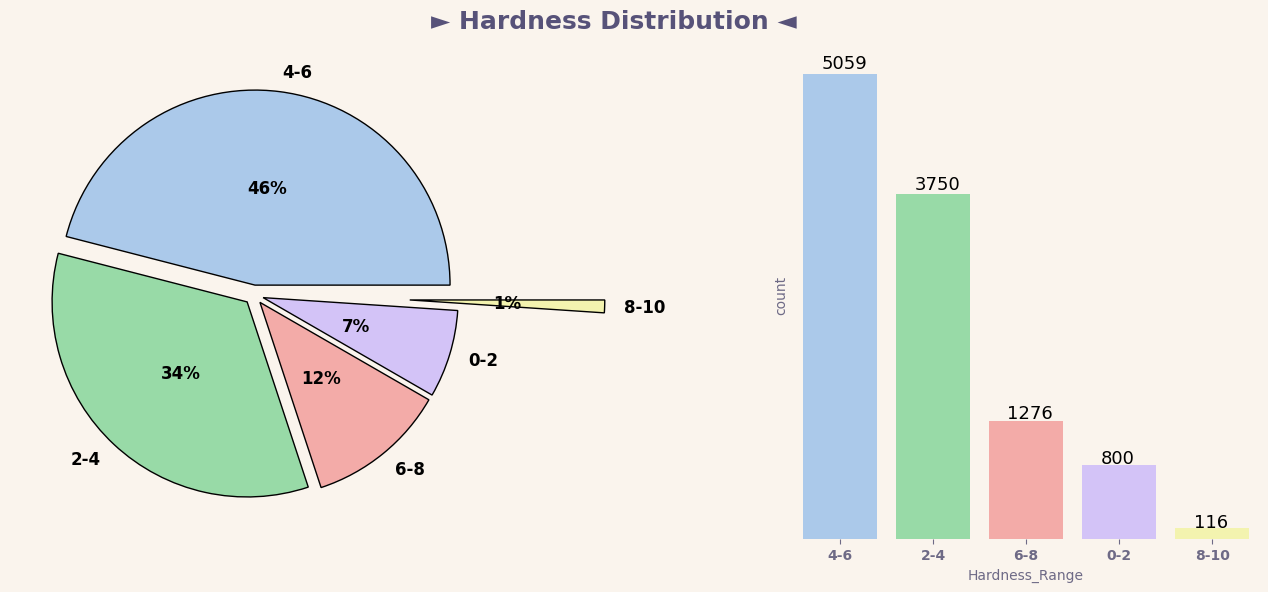

In [97]:
plot_target(train, 
            col="Hardness_Range", 
            title="Hardness", 
            pie_colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"])

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  I created a temporary categorical variable to check the distribution of the target variable.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Categorical</p>

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  No cat feature..
    

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Numerical</p>

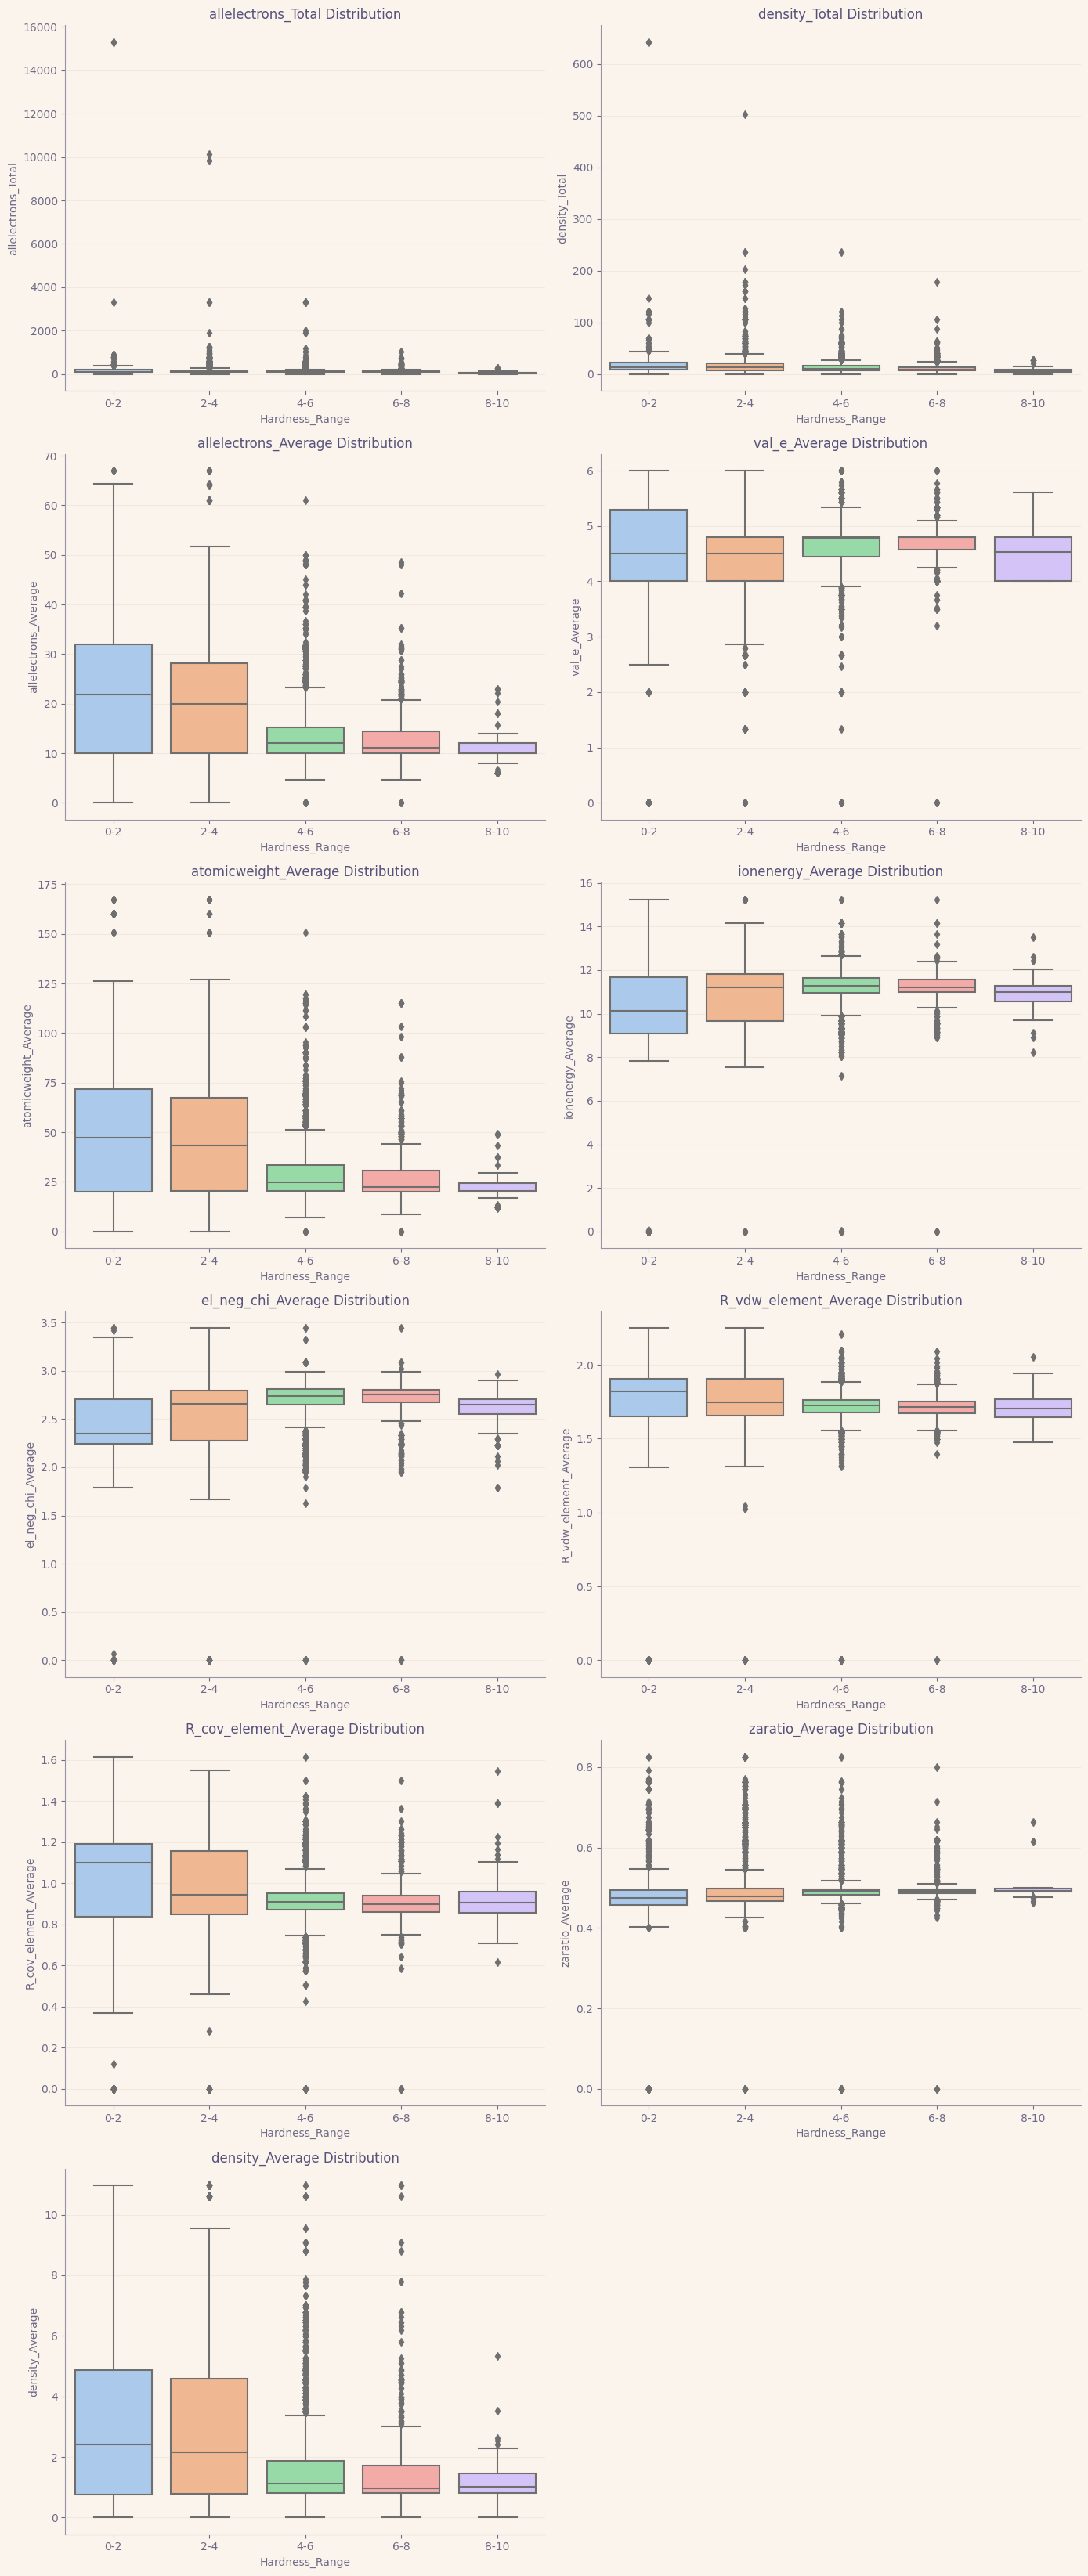

In [98]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="Hardness_Range", y=column, data=train,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
plt.show()

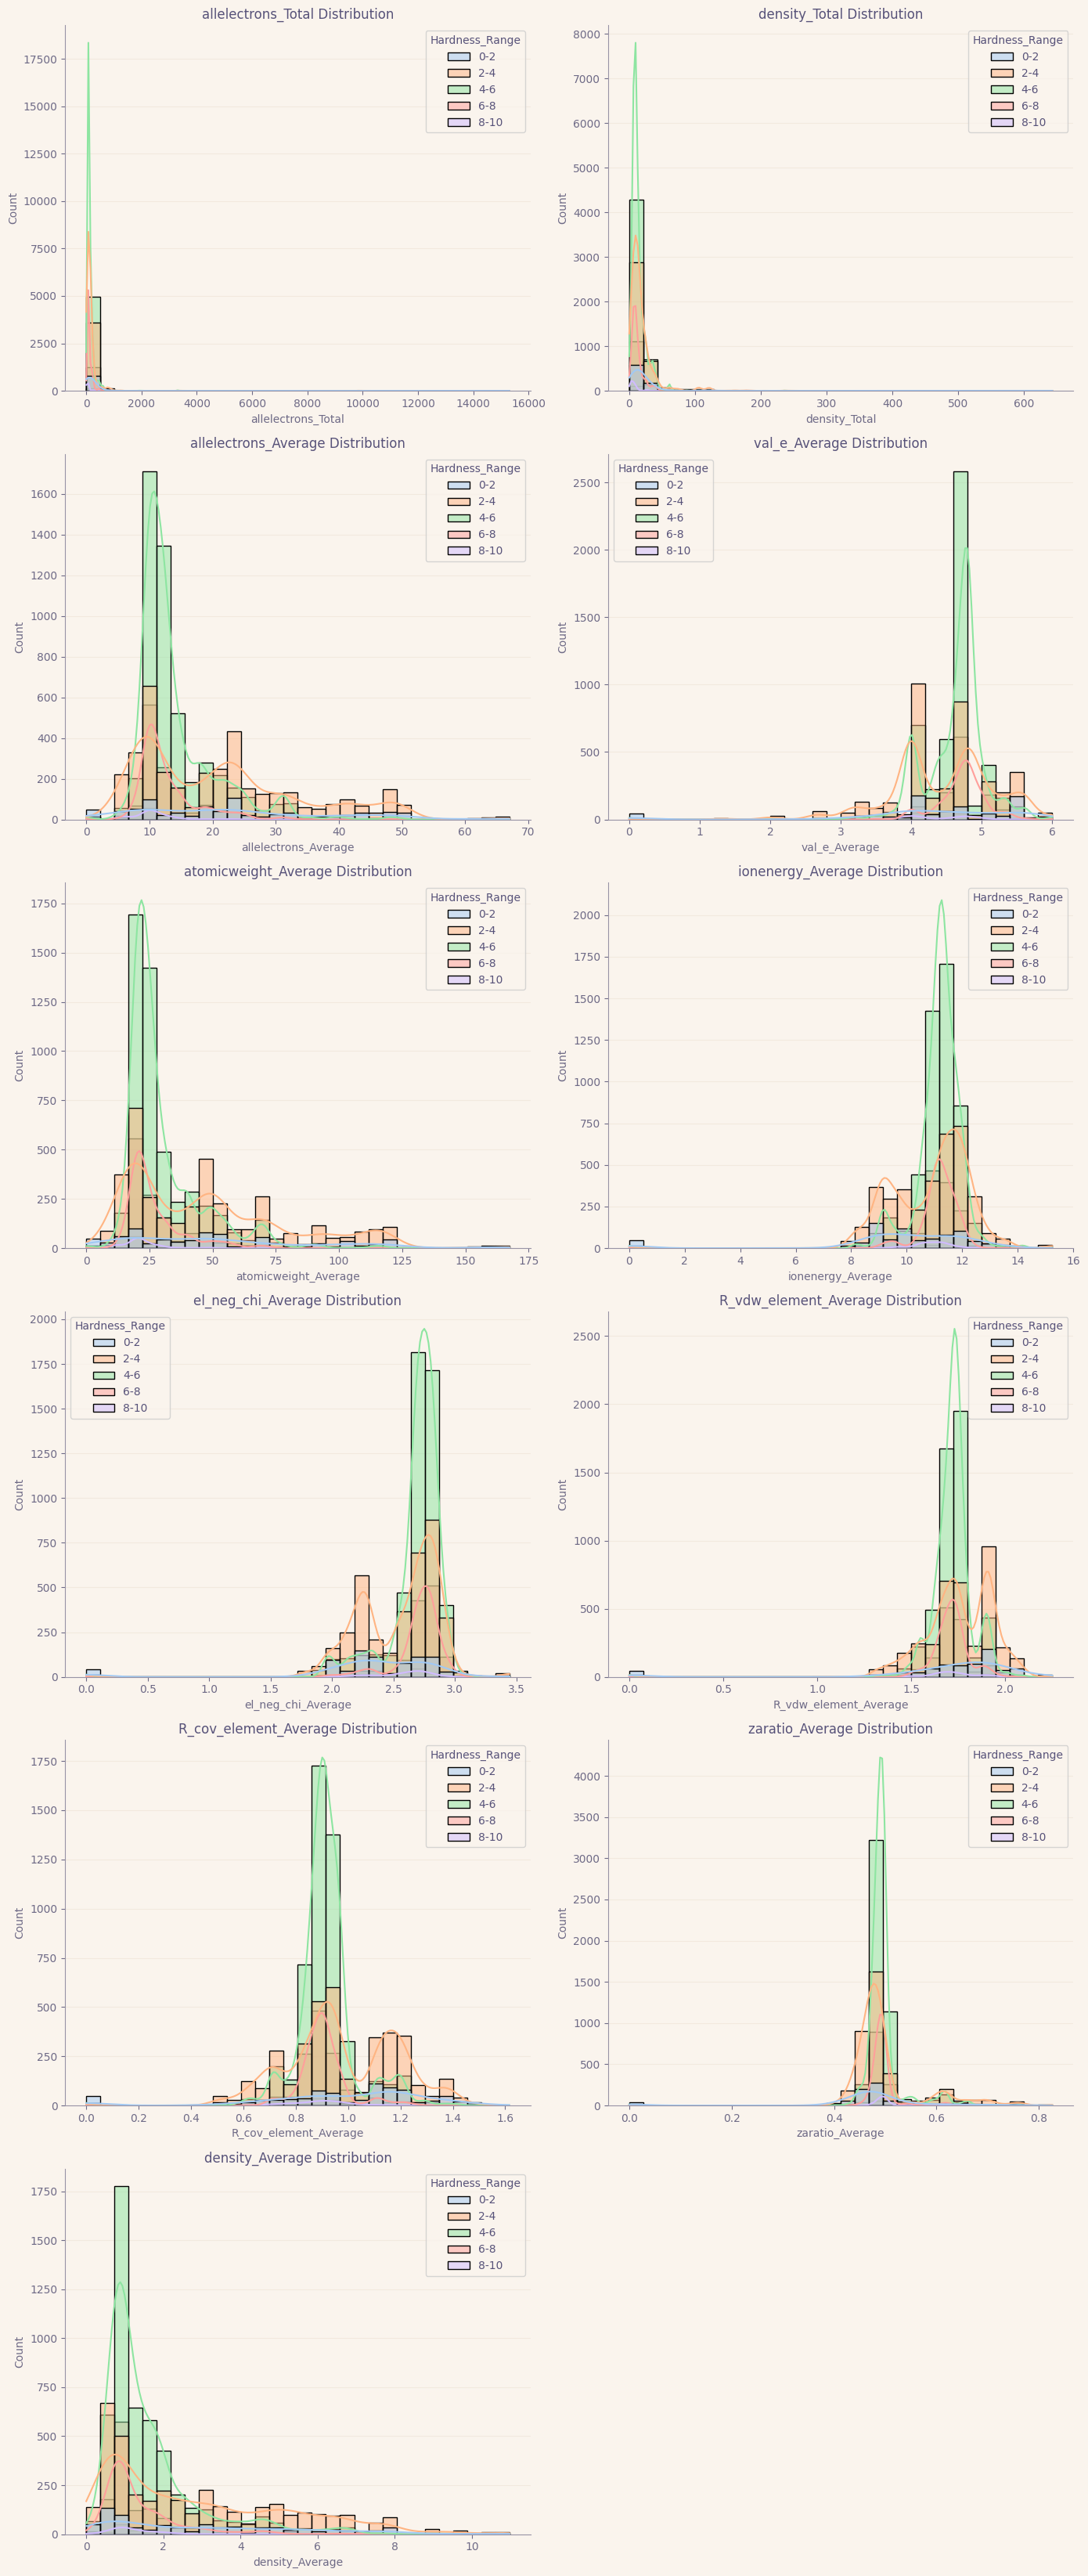

In [99]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="Hardness_Range", data=train,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
plt.show()    

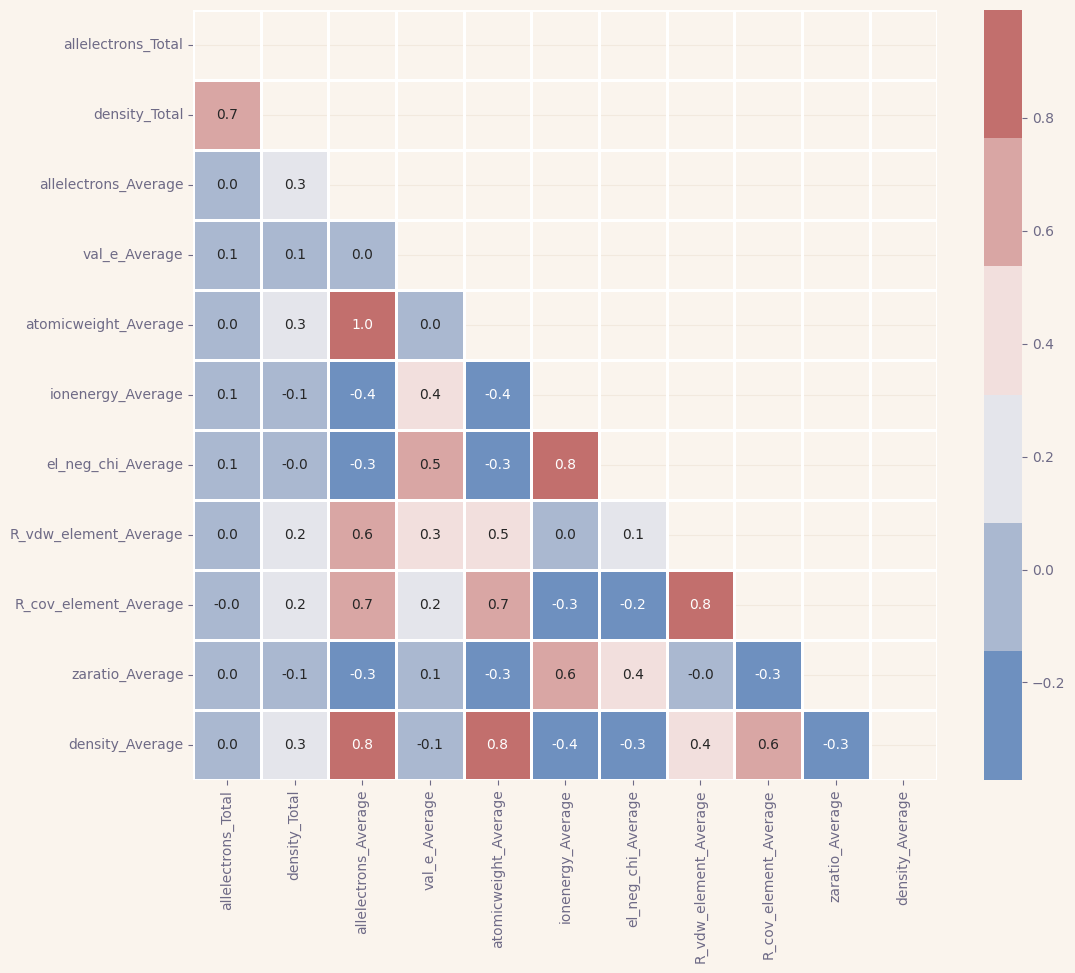

In [100]:
plt.figure(figsize=(12,10))
corr=train[num_cols].corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap=sns.color_palette("vlag"))
plt.show()

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Looks like we have highly correlated features I will drop it with function at underside, and also have outliner and skewness, but I won't take care of them since we are using tree models.

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🛠️Feature Engineering 🛠️</p>

In [101]:
def new_features(df):
    # Atomic weight and ionization energy ratio
    df['atomicweight_ionenergy_Ratio'] = df['atomicweight_Average'] / (df['ionenergy_Average'] + 0.0000001)
    
    # Electronegativity and Van der Waals radius ratio
    df['el_neg_chi_R_vdw_Ratio'] = df['el_neg_chi_Average'] / (df['R_vdw_element_Average'] + 0.0000001)
    
    # Covalent radius and density ratio
    df['R_cov_density_Ratio'] = df['R_cov_element_Average'] / (df['density_Average'] + 0.0000001)
    
    # Normalized density with respect to the total number of electrons
    df['normalized_density'] = df['density_Total'] / (df['allelectrons_Total'] + 0.0000001)
    
new_features(train)
new_features(test)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>🛠️ New Features:</font></h3>
    

1. **`atomicweight_ionenergy_Ratio`:**
   - **Calculation:** This feature is computed by taking the ratio of the average atomic weight (`atomicweight_Average`) to the sum of the average ionization energy (`ionenergy_Average`) and a very small constant (to avoid division by zero).
   - **Interpretation:** It represents a relationship between the mass of atoms and the energy required to remove an electron from them. The addition of a small constant is a common practice to prevent division by zero issues.

2. **`el_neg_chi_R_vdw_Ratio`:**
   - **Calculation:** This feature is the ratio of the average electronegativity (`el_neg_chi_Average`) to the sum of the average van der Waals radius (`R_vdw_element_Average`) and a very small constant.
   - **Interpretation:** It captures the relationship between the tendency of atoms to attract electrons and their van der Waals radius, providing insights into chemical bonding characteristics.

3. **`R_cov_density_Ratio`:**
   - **Calculation:** This feature is the ratio of the average covalent radius (`R_cov_element_Average`) to the sum of the average density (`density_Average`) and a very small constant.
   - **Interpretation:** It signifies the relationship between the size of atoms based on covalent radii and the density of the material.

4. **`normalized_density`:**
   - **Calculation:** This feature is the ratio of the total density (`density_Total`) to the sum of the total number of electrons (`allelectrons_Total`) and a very small constant.
   - **Interpretation:** It normalizes the density of the material with respect to the total number of electrons, providing a measure that considers both mass and charge.

In all cases, the addition of a small constant (e.g., `0.0000001`) is a regularization technique to handle potential numerical instability or division by zero errors. These features aim to capture meaningful relationships or normalized values that could be relevant for predicting hardness in the context of the given dataset.

In [102]:
def high_corr_drop(df, cols):
    df = df.copy()

    correlation = df[cols].corr().abs()
    mask = np.triu(np.ones_like(correlation).astype(bool), k=1)
    drop_list = correlation[(correlation.where(mask) > 0.91).sum() > 0].index.tolist()
    df = df.drop(drop_list, axis=1)
        
    return df

In [103]:
train = high_corr_drop(train,num_cols)
test = high_corr_drop(test,num_cols)
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>50)]

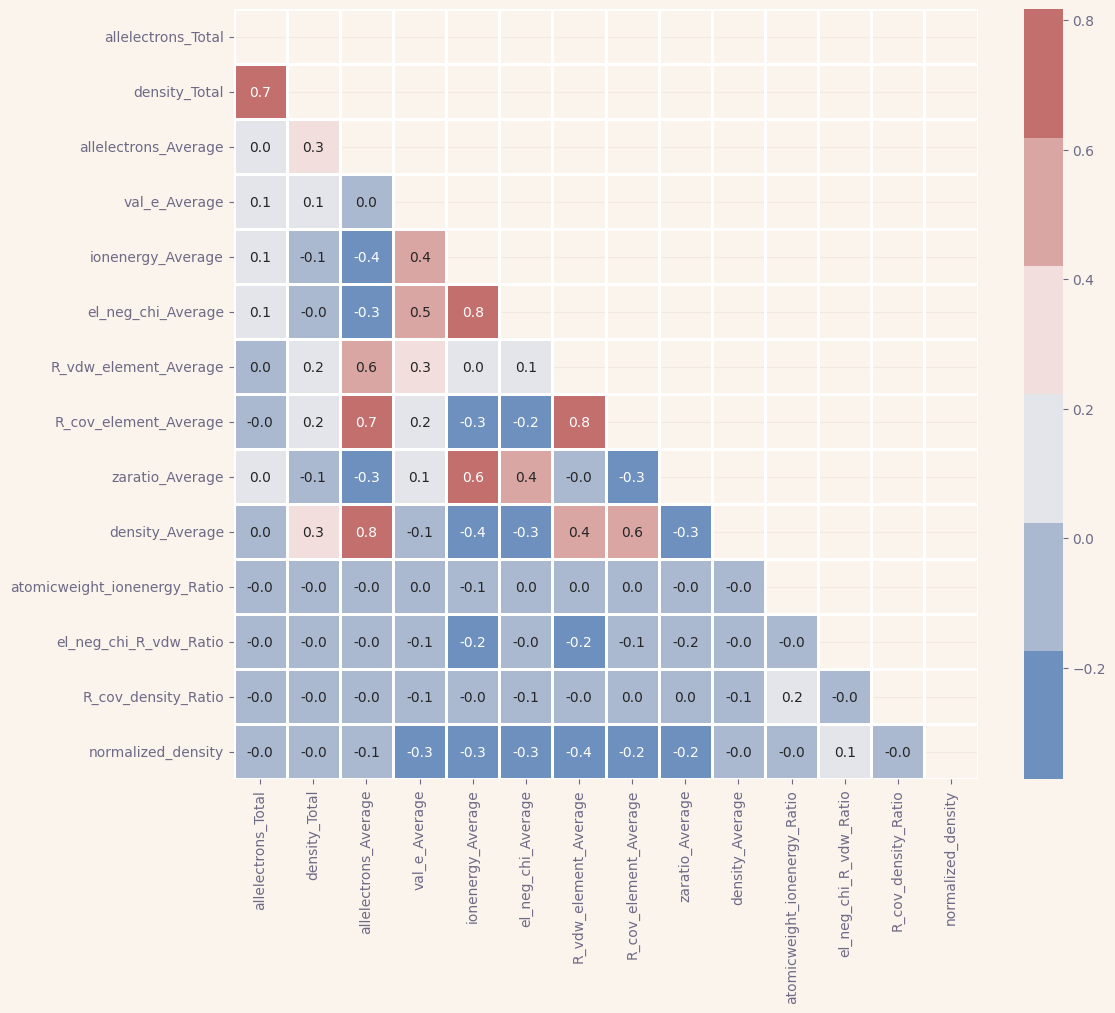

In [104]:
plt.figure(figsize=(12,10))
corr=train[num_cols].corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap=sns.color_palette("vlag"))
plt.show()

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Dropped highly correlated features.

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;">⚖️Modeling⚖️</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  You can reduce the size of data with PCA here, but I wont on this notebook.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Split</p>

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error 

X = train.drop(["Hardness","Hardness_Range"], axis=1)
y = train["Hardness"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 1916)


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Feature Importance</p>

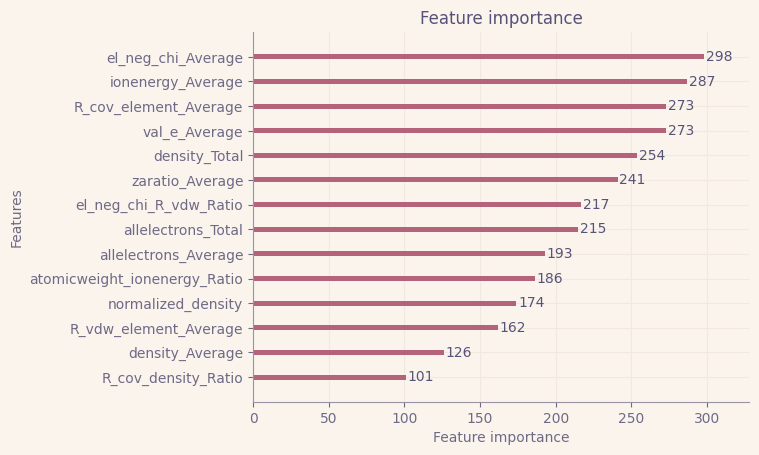

0.47467215931744633

In [106]:
import lightgbm
lgb = lightgbm.LGBMRegressor(objective = 'mae')
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb)
plt.show()
median_absolute_error(y_test,lgb.predict(X_test))

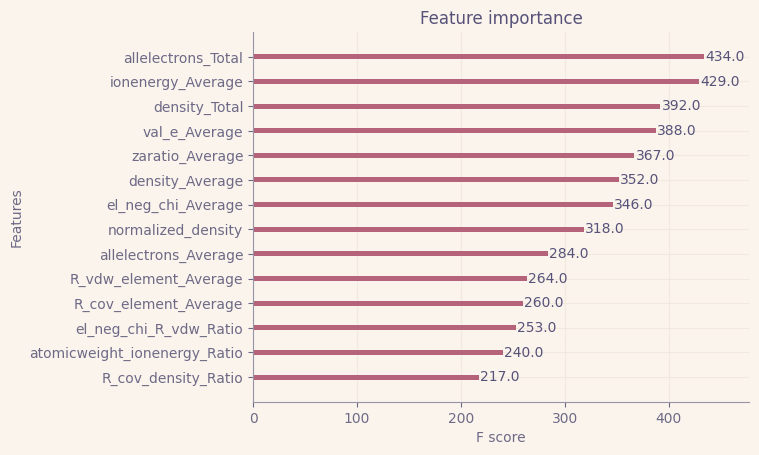

0.49384212493896484

In [107]:
import xgboost
xgb = xgboost.XGBRegressor(objective = 'reg:absoluteerror')
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb)
plt.show()
median_absolute_error(y_test,xgb.predict(X_test))

In [108]:
from sklearn.preprocessing import MinMaxScaler
lgb_importances = pd.DataFrame(dict(lgbm = lgb.feature_importances_), index=lgb.feature_name_)
xgb_importances = pd.DataFrame(dict(xgb = xgb.feature_importances_), index=xgb.feature_names_in_)
importances = pd.concat([lgb_importances,xgb_importances],axis=1)
min_max = MinMaxScaler((1,1.1))
importances["cross"] = min_max.fit_transform(importances[["lgbm"]]) * min_max.fit_transform(importances[["xgb"]])
sorted = importances.sort_values(by="cross", ascending=False)
sorted

,lgbm,xgb,cross
atomicweight_ionenergy_Ratio,186,0.178499,1.147462
ionenergy_Average,287,0.088651,1.132748
val_e_Average,273,0.083259,1.121152
R_cov_element_Average,273,0.082644,1.120669
el_neg_chi_Average,298,0.056583,1.113017
zaratio_Average,241,0.070534,1.094547
allelectrons_Average,193,0.094935,1.088118
density_Total,254,0.049641,1.085008
el_neg_chi_R_vdw_Ratio,217,0.062627,1.076043
allelectrons_Total,215,0.041427,1.058792


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Feature importances, sorted by their hybrid importance in LightGBM (lgb) and XGBoost (xgb), We may drop **density_Averag** and **R_cov_density_Ratio** (we added)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">CatBoostRegressor Regressor</p>

In [109]:
from catboost import CatBoostRegressor
import optuna

def objective_cat(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['MAE']),
        'logging_level': trial.suggest_categorical('logging_level', ['Silent']),
        "random_seed" : trial.suggest_categorical('random_seed', [42]),
        "grow_policy" : trial.suggest_categorical('grow_policy', ["Lossguide"]),
        "max_leaves" : trial.suggest_int("max_leaves", 8, 64),
        "iterations" : trial.suggest_int("iterations", 100, 700),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        "depth" : trial.suggest_int("depth", 3, 12),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 3, 15),
        'bagging_temperature' :trial.suggest_float('bagging_temperature', 1, 3),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg',0.01,0.1),

    }
    


    model_cat = CatBoostRegressor(**params)
    model_cat.fit(X_train, y_train)
    y_pred = model_cat.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [110]:
study_cat = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [111]:
# Print the best parameters
print('Best parameters', study_cat.best_params)

Best parameters {'objective': 'MAE', 'logging_level': 'Silent', 'random_seed': 42, 'grow_policy': 'Lossguide', 'max_leaves': 64, 'iterations': 699, 'learning_rate': 0.0776695115291243, 'depth': 11, 'subsample': 0.9727145032754415, 'colsample_bylevel': 0.8137532557407922, 'min_data_in_leaf': 12, 'bagging_temperature': 2.223744465292916, 'leaf_estimation_iterations': 8, 'l2_leaf_reg': 0.043292240550511354}


In [112]:
cat = CatBoostRegressor(**study_cat.best_params)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

print('Error: ', median_absolute_error(y_test, y_pred))

Error:  0.43775246710981675


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">LightGBM Regressor</p>

In [113]:
from lightgbm import LGBMRegressor
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['mae']),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        "num_leaves" : trial.suggest_int("num_leaves", 8, 50),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.5),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        
    }

    model_lgb = LGBMRegressor(**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [114]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [115]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'objective': 'mae', 'max_depth': 9, 'num_leaves': 48, 'min_child_samples': 14, 'learning_rate': 0.0332677891172265, 'n_estimators': 533, 'min_child_weight': 10, 'subsample': 0.977852277004017, 'colsample_bytree': 0.633223304438878, 'reg_alpha': 0.5967538536526751, 'reg_lambda': 0.2980423817392394, 'random_state': 42}


In [116]:
lgb = LGBMRegressor(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print('Error: ', median_absolute_error(y_test, y_pred))

Error:  0.42055206138518564


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">XGBoost Regressor</p>

In [117]:
from xgboost import XGBRegressor
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 700),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.5),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1),
        "seed" : trial.suggest_categorical('seed', [42]),
        'objective': trial.suggest_categorical('objective', ['reg:absoluteerror']),
    }
    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [118]:
study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [119]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.030150936957278093, 'n_estimators': 557, 'min_child_samples': 5, 'min_child_weight': 24, 'subsample': 0.774390540651249, 'reg_alpha': 0.12981494722192452, 'reg_lambda': 0.49848594586805794, 'colsample_bylevel': 0.743499719547698, 'colsample_bytree': 0.6508012790793543, 'colsample_bynode': 0.8426313379653357, 'seed': 42, 'objective': 'reg:absoluteerror'}


In [120]:
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Error: ', median_absolute_error(y_test, y_pred))

Error:  0.43562984466552734


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Voting Regressor</p>

In [121]:
!pip install sklego

In [122]:
from sklego.linear_model import LADRegression
models = pd.DataFrame()
models["cat"] = cat.predict(X_test)   
models["lgbm"] = lgb.predict(X_test)
models["xgb"] = xgb.predict(X_test)
weights = LADRegression().fit(models, y_test).coef_
pd.DataFrame(weights, index = models.columns, columns = ["weights"])

,weights
cat,0.245243
lgbm,0.535193
xgb,0.231249


In [123]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(estimators=[ ('cat', cat),
                                      ('lgbm', lgb), 
                                      ('xgb', xgb)],weights=weights)
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

print('Error: ', median_absolute_error(y_test, voting_pred))

Error:  0.433414166695977


# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🎲Prediction🎲</p>

In [125]:
sub["Hardness"]=voting.predict(test)
sub.to_csv('submission.csv',index=False)
sub

,id,Hardness
0,10407,2.506669
1,10408,2.489367
2,10409,5.925683
3,10410,4.390931
4,10411,5.584684
...,...,...
6934,17341,5.711136
6935,17342,4.007193
6936,17343,5.269161
6937,17344,4.980119
